<h2>Grover - example with 2 qubits</h2>

In [2]:
#Just run once to import all needed classes.
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

In [3]:
#Methods that will be used in the Oracle.
def controlled_anti_z(circuit, q0, q1):
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)

def controlled_z(circuit, q0, q1):
    circuit.h(q1)
    circuit.cx(q0,q1)
    circuit.h(q1)

<h3>Oracle (for query)</h3>

In [4]:
def oracle(circuit,quantum,number):
    if(number%4 < 2):
        circuit.x(quantum[1])
    if(number%2 == 0):
        controlled_anti_z(circuit,quantum[1],quantum[0])
    else:
        controlled_z(circuit,quantum[1],quantum[0])
    if(number%4 < 2):
        circuit.x(quantum[1])

Example of the Oracle.

  -1.0   0.0   0.0   0.0
   0.0  -1.0   0.0   0.0
   0.0   0.0   1.0   0.0
   0.0   0.0   0.0   1.0


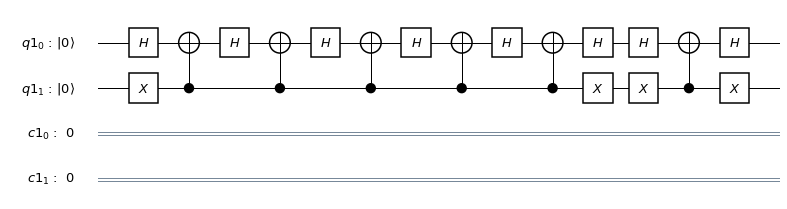

In [6]:
qreg1 =  QuantumRegister(2)
creg1 = ClassicalRegister(2)

mycircuit1 = QuantumCircuit(qreg1,creg1)

#Any value between 0 and 3.
oracle(mycircuit1,qreg1,0)
oracle(mycircuit1,qreg1,1)

job = execute(mycircuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit1,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<6): val  = " "+val
        s = s + val
    print(s)

mycircuit1.draw(output='mpl')

<h3>Diffusion (inversion)</h3>

In [7]:
def diffusion(circuit,quantum):
    circuit.x(quantum[2])
    circuit.h(quantum[2])
    
    circuit.h(quantum[1])
    circuit.h(quantum[0])
    circuit.x(quantum[1])
    circuit.x(quantum[0])

    circuit.ccx(quantum[1],quantum[0],quantum[2])

    circuit.x(quantum[1])
    circuit.x(quantum[0])
    circuit.h(quantum[1])
    circuit.h(quantum[0])

    circuit.h(quantum[2])
    circuit.x(quantum[2])

Demonstration of the diffusion.

   0.5  -0.5  -0.5  -0.5   0.0   0.0   0.0   0.0
  -0.5   0.5  -0.5  -0.5   0.0   0.0   0.0   0.0
  -0.5  -0.5   0.5  -0.5   0.0   0.0   0.0   0.0
  -0.5  -0.5  -0.5   0.5   0.0   0.0   0.0   0.0
   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0
   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0
   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0
   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0


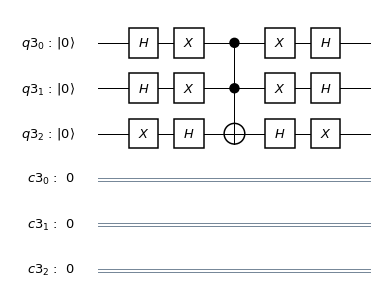

In [9]:
qreg2 =  QuantumRegister(3)
creg2 = ClassicalRegister(3)

mycircuit2 = QuantumCircuit(qreg2,creg2)

diffusion(mycircuit2,qreg2)

job = execute(mycircuit2,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit2,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<6): val  = " "+val
        s = s + val
    print(s)

mycircuit2.draw(output='mpl')

<h3>Grover - demo</h3>

{'000': 10000}


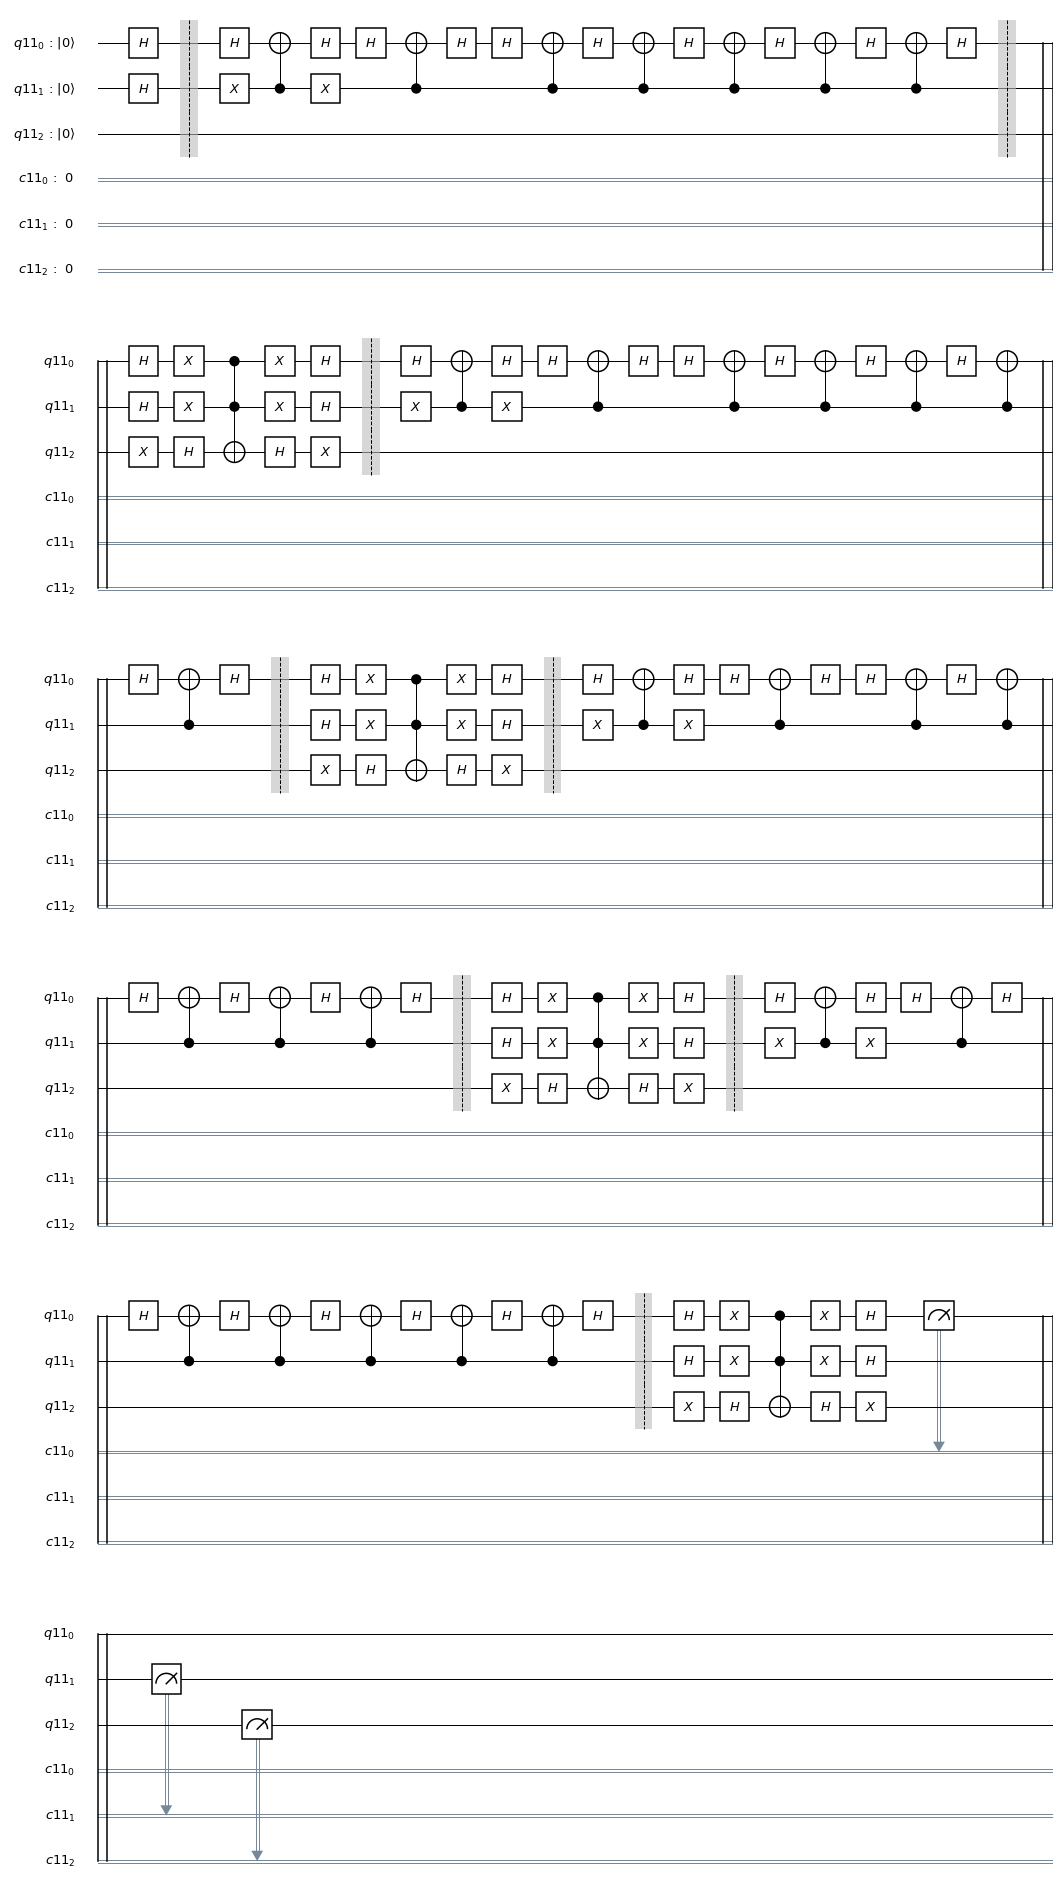

In [17]:
qreg3 =  QuantumRegister(3)
creg3 = ClassicalRegister(3)

mycircuit3 = QuantumCircuit(qreg3,creg3)

#Grover itself
#Initial step - superposition.
for i in range(2):
    mycircuit3.h(qreg3[i])
#Grover iterations.
for i in range(4):
    mycircuit3.barrier()
    oracle(mycircuit3,qreg3,1)
    oracle(mycircuit3,qreg3,3)
    oracle(mycircuit3,qreg3,2)
    mycircuit3.barrier()
    diffusion(mycircuit3,qreg3)

mycircuit3.measure(qreg3,creg3)

job = execute(mycircuit3,Aer.get_backend('qasm_simulator'),shots=10000)
counts1 = job.result().get_counts(mycircuit3)
print(counts1) # print the outcomes

mycircuit3.draw(output='mpl')